In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn.functional as F
from torchsummary import summary

In [ ]:
transform = transforms.Compose([
#     transforms.CenterCrop(224),
    transforms.RandomCrop(32,padding=4), # 数据增广
    transforms.RandomHorizontalFlip(),  # 数据增广
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
]) 

In [ ]:
Batch_Size = 256

In [ ]:
trainset = datasets.CIFAR10(root='./data', train=True,download=True, transform=transform)
testset = datasets.CIFAR10(root='./data',train=False,download=True,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=Batch_Size,shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=Batch_Size,shuffle=True, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
trainset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
classes = trainset.classes
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
trainset.class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [ ]:
trainset.data.shape #50000是图片数量，32x32是图片大小，3是通道数量RGB

(50000, 32, 32, 3)

In [ ]:
#查看数据类型
print(type(trainset.data))
print(type(trainset))

<class 'numpy.ndarray'>
<class 'torchvision.datasets.cifar.CIFAR10'>


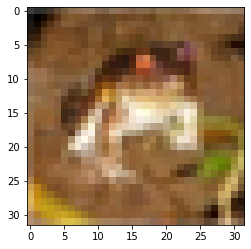

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(trainset.data[0])
im,label = iter(trainloader).next()

In [ ]:
def imshow(img):
    img = img / 2 + 0.5
    img = np.transpose(img.numpy(),(1,2,0))
    plt.imshow(img)

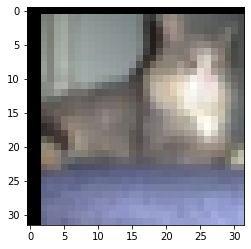

In [ ]:
imshow(im[0])

In [ ]:
im[0].shape

torch.Size([3, 32, 32])

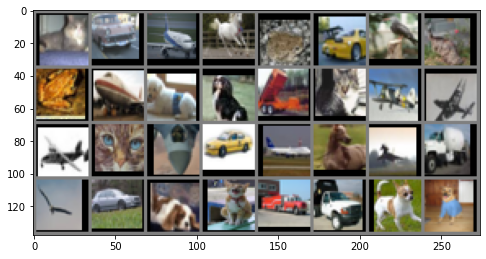

In [ ]:
plt.figure(figsize=(8,12))
imshow(torchvision.utils.make_grid(im[:32]))

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
#定义网络
class Mynet(nn.Module):# nn.Module是所有神经网络的基类，我们自己定义任何神经网络，都要继承nn.Module
    def __init__(self, num_classes=10):
        super(Mynet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3,64,kernel_size=3,padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            
            nn.Conv2d(64,128,kernel_size=3,padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2,padding=1),
            
            nn.Conv2d(128,64,kernel_size=3,padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            
            nn.Conv2d(64,32,kernel_size=3,padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2,padding=1)
            )
        self.classifier = nn.Sequential(
            nn.Linear(32*9*9,2048),
            nn.ReLU(True),
            nn.Linear(2048, num_classes),
            )

 
    def forward(self, x):
        out = self.features(x) 
#         print(out.shape)
        out = out.view(out.size(0), -1)
#         print(out.shape)
        out = self.classifier(out)
#         print(out.shape)
        return out
net = Mynet().to(device)

In [ ]:
summary(net,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,856
       BatchNorm2d-5          [-1, 128, 32, 32]             256
              ReLU-6          [-1, 128, 32, 32]               0
         MaxPool2d-7          [-1, 128, 17, 17]               0
            Conv2d-8           [-1, 64, 17, 17]          73,792
       BatchNorm2d-9           [-1, 64, 17, 17]             128
             ReLU-10           [-1, 64, 17, 17]               0
           Conv2d-11           [-1, 32, 17, 17]          18,464
      BatchNorm2d-12           [-1, 32, 17, 17]              64
             ReLU-13           [-1, 32, 17, 17]               0
        MaxPool2d-14             [-1, 3

In [ ]:
print(net)

Mynet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
    (7): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (classifier): Seque

In [ ]:
test_x = torch.randn(1,3,32,32).to(device)
test_y = net(test_x)
print(test_y.shape)

torch.Size([1, 10])


In [ ]:
net =Mynet().to(device)
if device == 'cuda':
    net = nn.DataParallel(net)
   
    torch.backends.cudnn.benchmark = True

In [ ]:
import torch.optim as optim
optimizer = optim.SGD(net.parameters(), lr=1e-1, momentum=0.9, weight_decay=5e-4)
criterion = nn.CrossEntropyLoss()
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor=0.5 ,patience = 5,min_lr = 0.000001) # 动态更新学习率
# scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[75, 150], gamma=0.5)
import time
epoch = 100

### 6. 训练

In [ ]:
import os
if not os.path.exists('./model'):
    os.makedirs('./model')
else:
    print('文件已存在')
save_path = './model/Mynet.pth'

文件已存在


In [ ]:
from utils import train
from utils import plot_history
Acc, Loss, Lr = train(net, trainloader, testloader, epoch, optimizer, criterion, scheduler, save_path, verbose = True)

Epoch [  1/100]  Train Loss:1.668925  Train Acc:39.16% Test Loss:1.370022  Test Acc:50.40%  Learning Rate:0.100000	Time 00:25
Epoch [  2/100]  Train Loss:1.202433  Train Acc:56.32% Test Loss:1.222443  Test Acc:55.80%  Learning Rate:0.100000	Time 00:24
Epoch [  3/100]  Train Loss:0.972045  Train Acc:65.14% Test Loss:1.040824  Test Acc:63.11%  Learning Rate:0.100000	Time 00:24
Epoch [  4/100]  Train Loss:0.839969  Train Acc:70.23% Test Loss:1.301779  Test Acc:57.27%  Learning Rate:0.100000	Time 00:24
Epoch [  5/100]  Train Loss:0.757826  Train Acc:73.21% Test Loss:0.906069  Test Acc:69.14%  Learning Rate:0.100000	Time 00:24
Epoch [  6/100]  Train Loss:0.696939  Train Acc:75.56% Test Loss:0.907697  Test Acc:69.03%  Learning Rate:0.100000	Time 00:24
Epoch [  7/100]  Train Loss:0.662577  Train Acc:76.83% Test Loss:0.881946  Test Acc:70.17%  Learning Rate:0.100000	Time 00:24
Epoch [  8/100]  Train Loss:0.627867  Train Acc:78.14% Test Loss:0.730907  Test Acc:75.03%  Learning Rate:0.100000	Tim

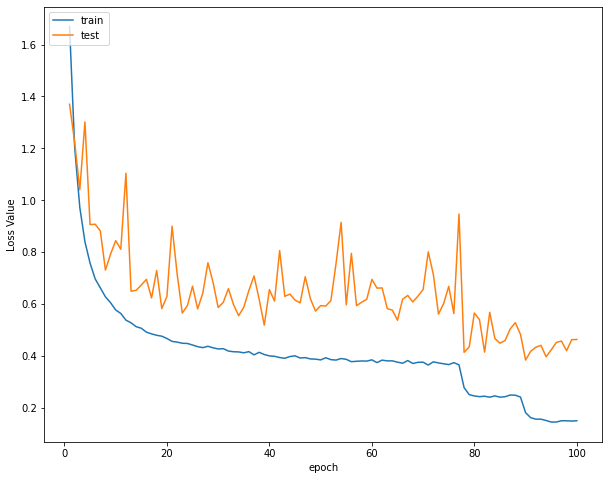

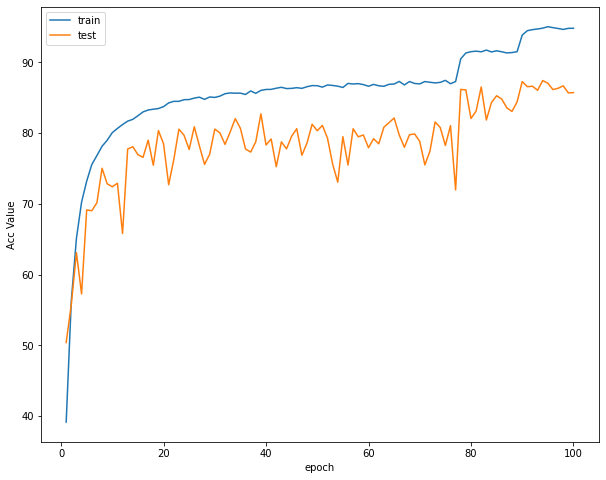

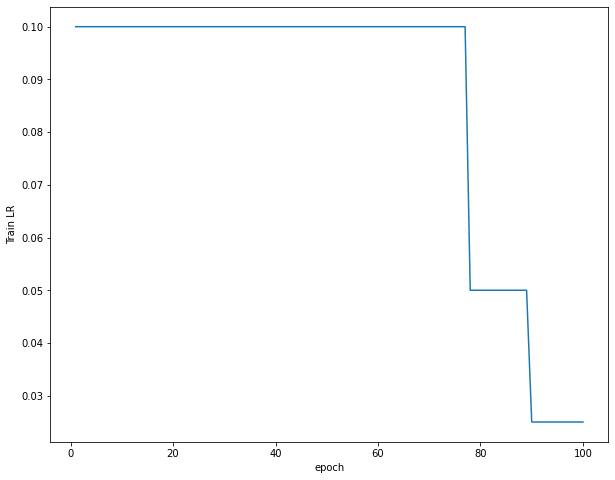

In [ ]:
plot_history(epoch ,Acc, Loss, Lr)

In [ ]:
correct = 0   
total = 0     
# testloader = torch.utils.data.DataLoader(testset, batch_size=32,shuffle=True, num_workers=2)
for data in testloader:   
    images, labels = data
    images = images.to(device)
    labels = labels.to(device)
    net.eval()   
    if hasattr(torch.cuda, 'empty_cache'):
        torch.cuda.empty_cache()
    outputs = net(images)  
    
     
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)          
    correct += (predicted == labels).sum()  

print('Accuracy of the network on the 10000 test images: %.2f %%' % (100 * correct / total))
 

Accuracy of the network on the 10000 test images: 85.66 %


In [ ]:
 
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
# testloader = torch.utils.data.DataLoader(testset, batch_size=64,shuffle=True, num_workers=2)
net.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        if hasattr(torch.cuda, 'empty_cache'):
            torch.cuda.empty_cache()
        outputs = net(images)

        _, predicted = torch.max(outputs.data, 1)
    
        c = (predicted == labels).squeeze()
        for i in range(len(images)):       
            label = labels[i]   
            class_correct[label] += c[i]
            class_total[label] += 1
 
 
for i in range(10):
    print('Accuracy of %5s : %.2f %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of airplane : 86.30 %
Accuracy of automobile : 91.90 %
Accuracy of  bird : 85.20 %
Accuracy of   cat : 79.70 %
Accuracy of  deer : 86.80 %
Accuracy of   dog : 81.50 %
Accuracy of  frog : 70.40 %
Accuracy of horse : 92.60 %
Accuracy of  ship : 91.30 %
Accuracy of truck : 92.40 %


Accuracy Rate = 85.546875%


<Figure size 1800x288 with 0 Axes>

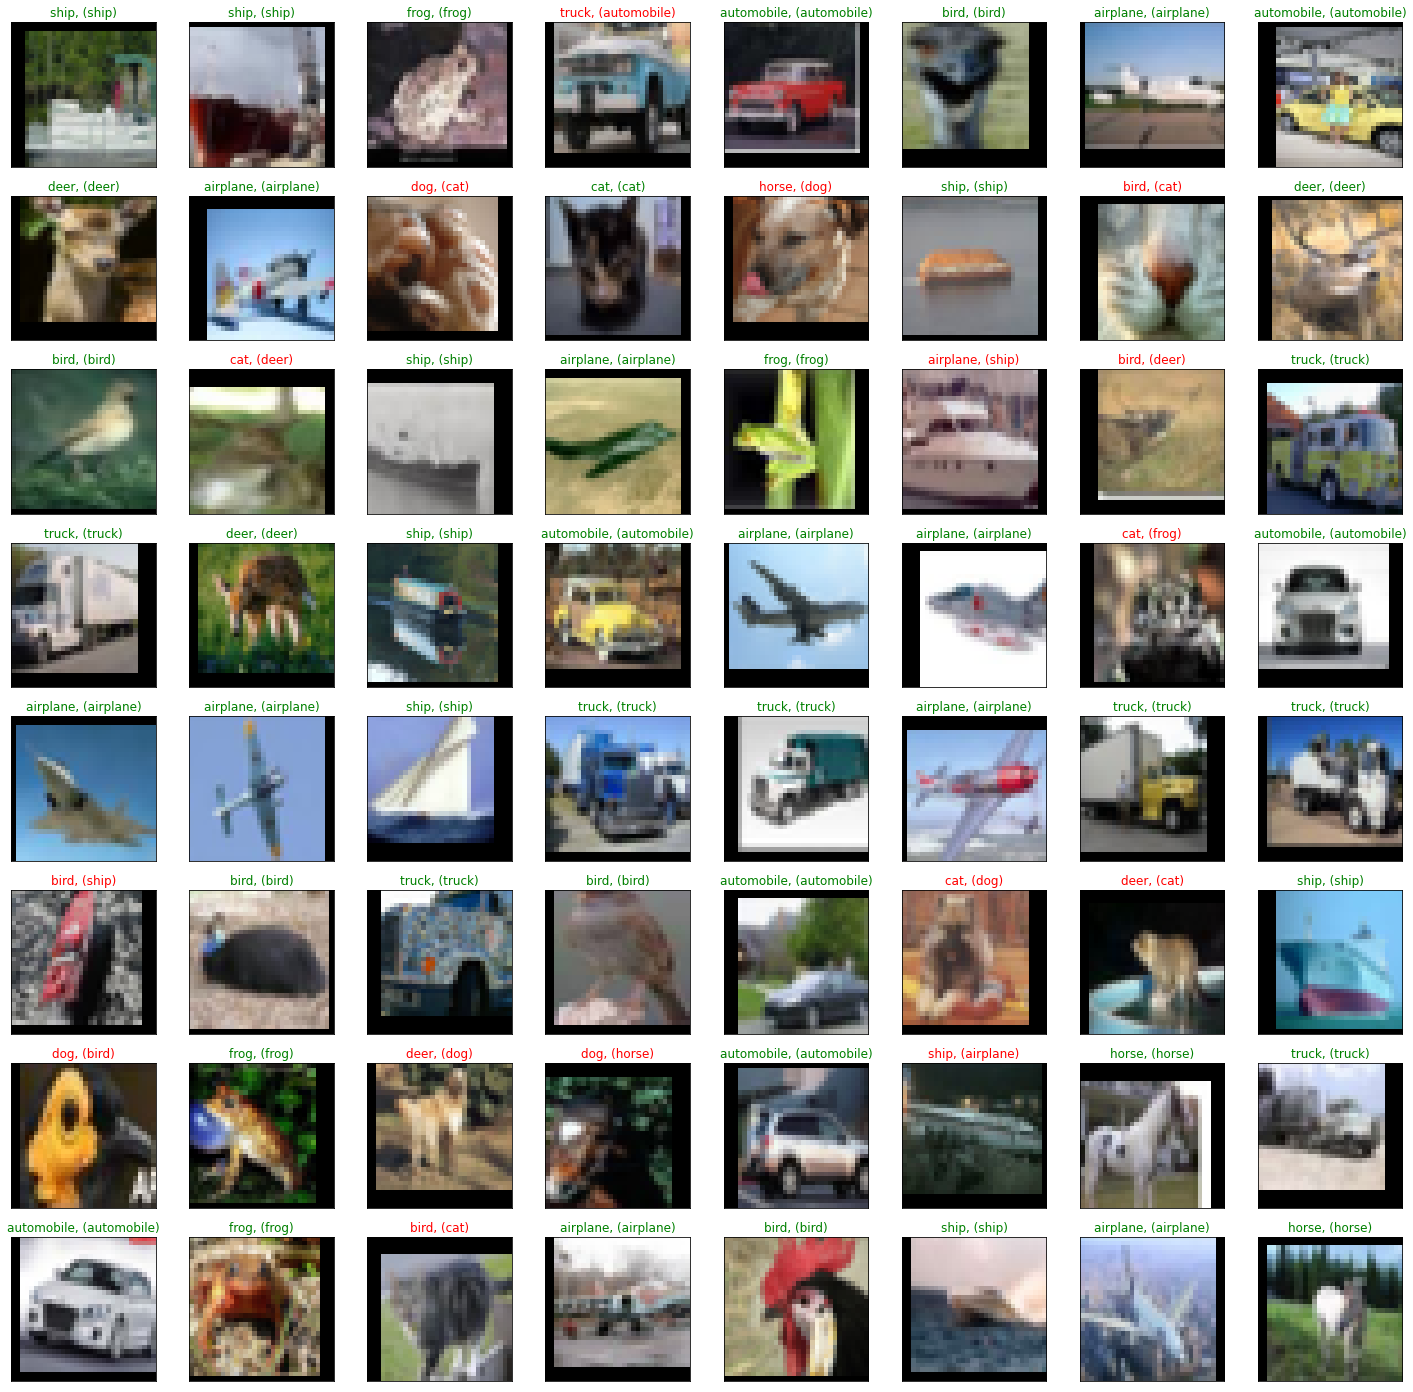

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()
images_ = images
#images_ = images_.view(images.shape[0], -1)
images_ = images_.to(device)
labels = labels.to(device)
val_output = net(images_)
_, val_preds = torch.max(val_output, 1)

fig = plt.figure(figsize=(25,4))

correct = torch.sum(val_preds == labels.data).item()

val_preds = val_preds.cpu()
labels = labels.cpu()

print("Accuracy Rate = {}%".format(correct/len(images) * 100))

fig = plt.figure(figsize=(25,25))
for idx in np.arange(64):    
    ax = fig.add_subplot(8, 8, idx+1, xticks=[], yticks=[])
    #fig.tight_layout()
#     plt.imshow(im_convert(images[idx]))
    imshow(images[idx])
    ax.set_title("{}, ({})".format(classes[val_preds[idx].item()], classes[labels[idx].item()]), 
                 color = ("green" if val_preds[idx].item()==labels[idx].item() else "red"))

Accuracy Rate = 88.671875%


<Figure size 1800x288 with 0 Axes>

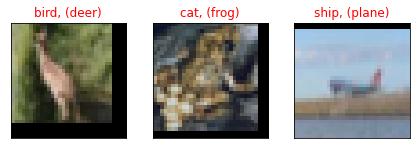

In [ ]:
 


from numpy.lib import index_tricks
from numpy.lib.index_tricks import IndexExpression
dataiter = iter(testloader)
images, labels = dataiter.next()
images_ = images
#images_ = images_.view(images.shape[0], -1)
images_ = images_.to(device)
labels = labels.to(device)
val_output = net(images_)
_, val_preds = torch.max(val_output, 1)

fig = plt.figure(figsize=(25,4))

correct = torch.sum(val_preds == labels.data).item()

val_preds = val_preds.cpu()
labels = labels.cpu()

print("Accuracy Rate = {}%".format(correct/len(images) * 100))

fig = plt.figure(figsize=(25,25))
index = []
for idx in np.arange(32):    
    if val_preds[idx].item()!=labels[idx].item():
      index.append(idx)
  #     ax = fig.add_subplot(8, 8, idx+1, xticks=[], yticks=[])
  #     #fig.tight_layout()
  # #     plt.imshow(im_convert(images[idx]))
  #     imshow(images[idx])
  #     ax.set_title("{}, ({})".format(classes[val_preds[idx].item()], classes[labels[idx].item()]), 
  #                 color = ("green" if val_preds[idx].item()==labels[idx].item() else "red"))
    else:
      continue

for i,idx in enumerate(index):
  # print(idx)
  ax = fig.add_subplot(10, 10, i+1, xticks=[], yticks=[])
  #fig.tight_layout()
#     plt.imshow(im_convert(images[idx]))
  imshow(images[idx])
  ax.set_title("{}, ({})".format(classes[val_preds[idx].item()], classes[labels[idx].item()]), 
              color = ("green" if val_preds[idx].item()==labels[idx].item() else "red"))

In [ ]:
torch.save(net,save_path[:-4]+'_'+str(epoch)+'.pth')
# torch.save(net, './model/ResNet34.pth')

In [ ]:
import torch
from PIL import Image
from torch.autograd import Variable
import torch.nn.functional as F
from torchvision import datasets, transforms
import numpy as np
 
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = Mynet()

model = torch.load(save_path)  #  
# model = model.to('cuda')
model.eval()  # 
 
img = Image.open("./airplane.jpg").convert('RGB')  

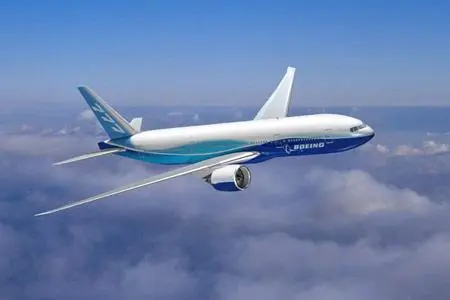

In [ ]:
img

In [ ]:
trans = transforms.Compose([transforms.Resize((32,32)),
                            transforms.ToTensor(),
                            transforms.Normalize(mean=(0.5, 0.5, 0.5), 
                                                 std=(0.5, 0.5, 0.5)),
                           ])
 
img = trans(img)
img = img.to(device)
# 图片扩展多一维,因为输入到保存的模型中是4维的[batch_size,通道,长，宽]，而普通图片只有三维，[通道,长，宽]
img = img.unsqueeze(0)  
    # 扩展后，为[1，1，28，28]
output = model(img)
prob = F.softmax(output,dim=1) #prob是10个分类的概率
print("probability is:",prob)
value, predicted = torch.max(output.data, 1)
print("classification:",predicted.item())
print(value)
pred_class = classes[predicted.item()]
print("prediction:",pred_class)

概率 tensor([[1.0000e+00, 1.0726e-10, 2.0052e-06, 2.7759e-11, 1.6614e-09, 3.5850e-12,
         5.6012e-12, 4.6728e-11, 1.5028e-07, 1.1364e-09]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
类别 0
tensor([19.2953], device='cuda:0')
分类 plane
